# Loan Status Prediction

### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

**Independent Variables:**

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area


**Dependent Variable (Target Variable):**

- Loan_Status

<img src = "loan.jpg" style = "width:400px;height:300px"/>

### Steps to follow:-
1. Import Libraries
2. Import Dataset
3. Data Exploration
4. Exploratory Data Analysis
5. Data Cleaning & Preprocessing
6. Model Building
7. Result
8. Testing
9. Conclusion

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import Dataset


In [2]:
df=pd.read_csv('loan_status.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Data Exploration

In [3]:
# Check shape of data
df.shape

(614, 13)

There are 614 rows with 13 columns

In [4]:
# describe statistical data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Check Null values in dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some null values present in dataset in Gender, Married, Dependents, self_employed, LoanAmount, Loan_Amount_Term, Credit_history

In [8]:
# Check unique values
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## Exploratory  Data Analysis (EDA)

### Data Visualization

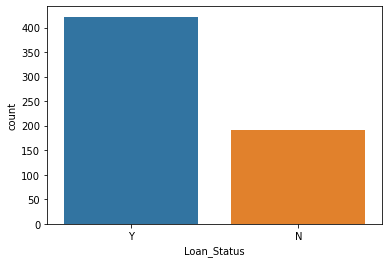

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
sns.countplot(df["Loan_Status"])
plt.show()
df.Loan_Status.value_counts()

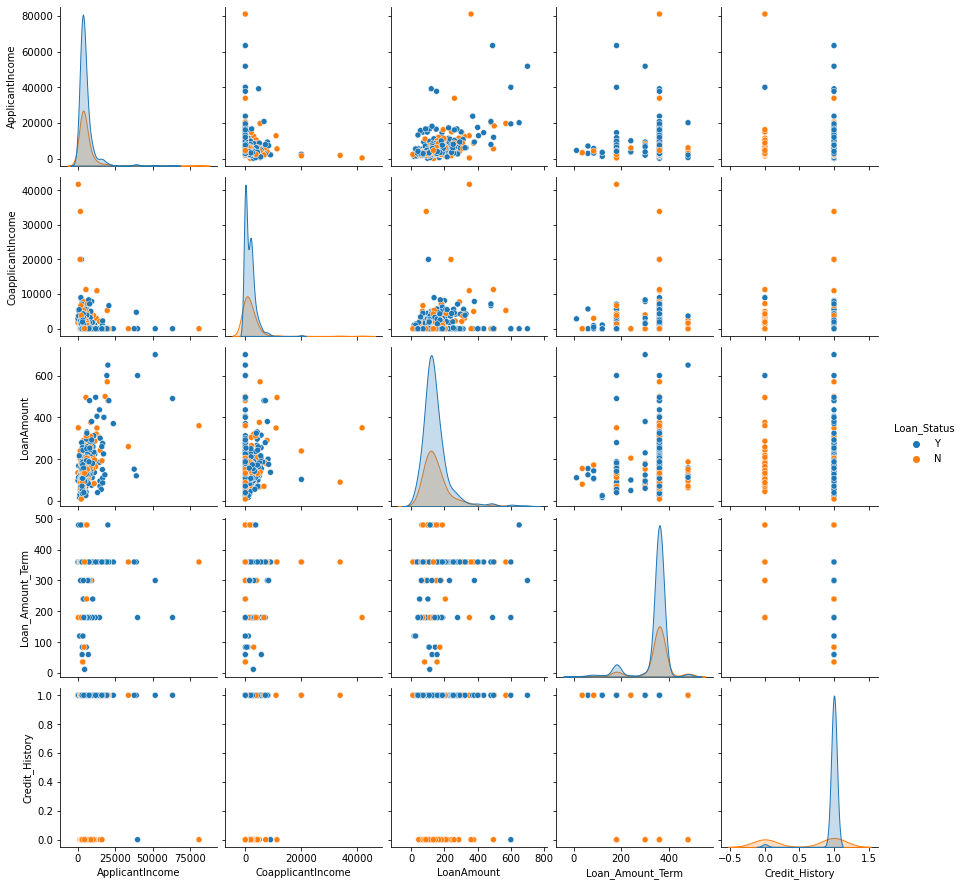

In [10]:
sns.pairplot(data= df, hue= "Loan_Status")
plt.show()

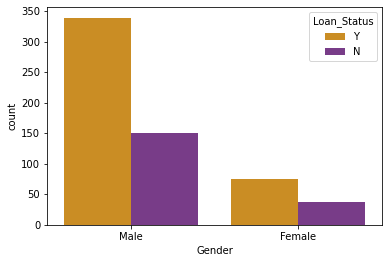

In [11]:
sns.countplot(df['Gender'], hue= df["Loan_Status"],  palette= 'CMRmap_r')
plt.show()

Countplot shows the number of males is more than females

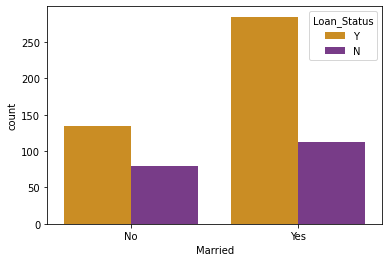

In [12]:
sns.countplot(df['Married'], hue= df["Loan_Status"], palette='CMRmap_r')
plt.show()

Most of the peoples are married

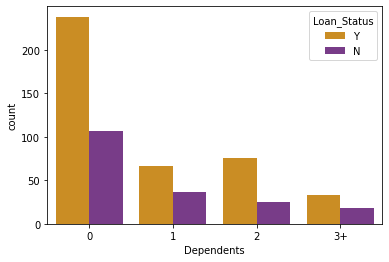

In [13]:
sns.countplot(df['Dependents'], hue= df["Loan_Status"], palette='CMRmap_r')
plt.show()

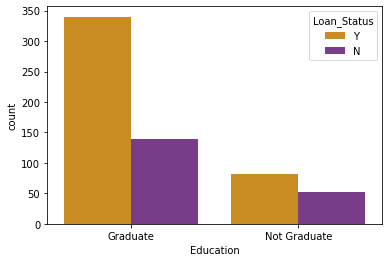

In [14]:
sns.countplot(df['Education'], hue= df["Loan_Status"], palette='CMRmap_r')
plt.show()

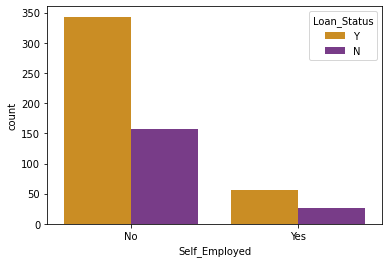

In [15]:
sns.countplot(df['Self_Employed'], hue= df["Loan_Status"], palette='CMRmap_r')
plt.show()

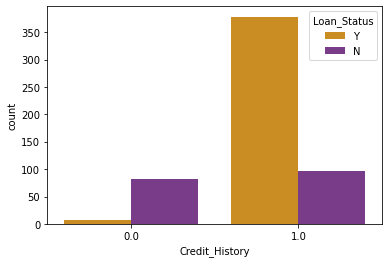

In [16]:
sns.countplot(df['Credit_History'], hue= df["Loan_Status"], palette='CMRmap_r')
plt.show()

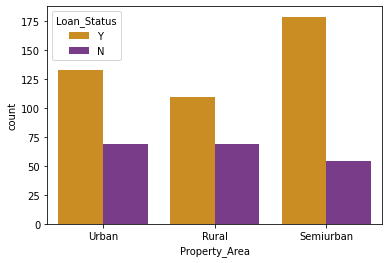

In [17]:
sns.countplot(df['Property_Area'], hue= df["Loan_Status"], palette='CMRmap_r')
plt.show()

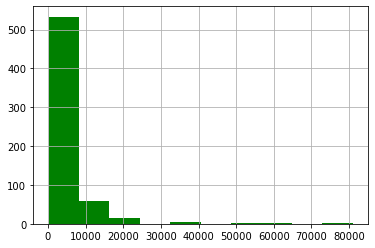

In [18]:
df['ApplicantIncome'].hist(facecolor= "g")
plt.show()

Plot shows there are most of the applocants have income less than Rs.10000.

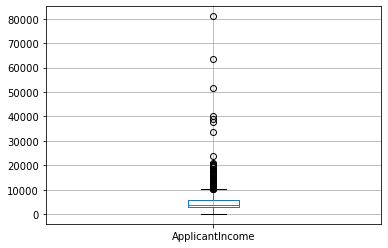

In [19]:
df.boxplot(column='ApplicantIncome')
plt.show()

Boxplot shows there are presence of a lot of outliers/extrime values. This can be attributed to the imcome disparity in the society

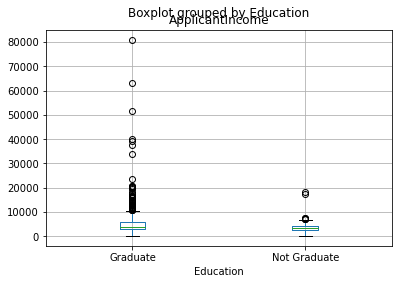

In [20]:
df.boxplot(column='ApplicantIncome', by = 'Education')
plt.show()

We can see that there are no substantial difference between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers

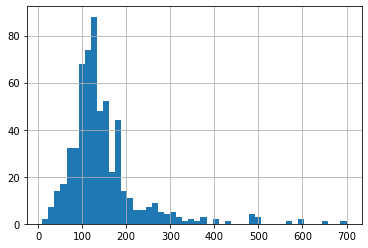

In [21]:
df['LoanAmount'].hist(bins=50)
plt.show()

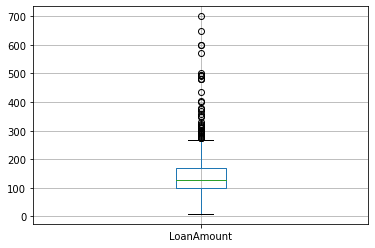

In [22]:
df.boxplot(column='LoanAmount')
plt.show()

Loan amount has missing as well as extreme values.

### Data Cleaning
#### Filling Missing Values

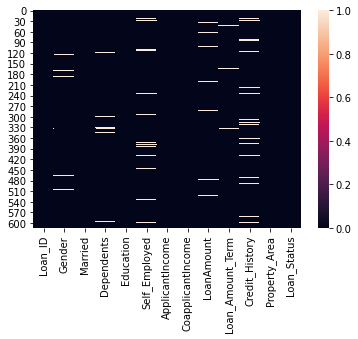

In [23]:
# heatmap on null values
sns.heatmap(df.isnull())
plt.show()

In [24]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [25]:
df.Gender = df.Gender.fillna('Male')

In [26]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [27]:
df.Married = df.Married.fillna('Yes')

In [28]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [29]:

df.Dependents = df.Dependents.fillna('0')

In [30]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [31]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [32]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [33]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)

In [34]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [35]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [36]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [37]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [38]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

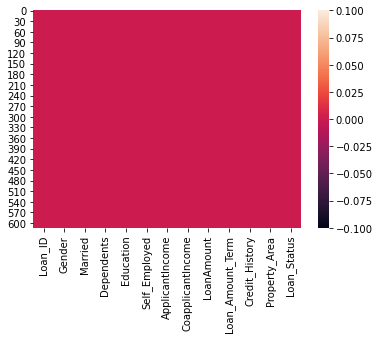

In [39]:
sns.heatmap(df.isnull())
plt.show()

Missing values are removed successfully

In [40]:
df.drop("Loan_ID",axis=1,inplace=True)

In [41]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [42]:
#let us encode the data using ordinal encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=le.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=le.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=le.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area']=le.fit_transform(df['Property_Area'].values.reshape(-1,1))
df['Loan_Amount_Term']=le.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Education']=le.fit_transform(df['Education'].values.reshape(-1,1))
df['Credit_History']=le.fit_transform(df['Credit_History'].values.reshape(-1,1))
df['Property_Area']=le.fit_transform(df['Property_Area'].values.reshape(-1,1))
df['Loan_Status']=le.fit_transform(df['Loan_Status'].values.reshape(-1,1))


In [43]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,8,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,8,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,8,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,8,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,8,1,0,1
610,1,1,3,0,0,4106,0.0,40.000000,5,1,0,1
611,1,1,1,0,0,8072,240.0,253.000000,8,1,2,1
612,1,1,2,0,0,7583,0.0,187.000000,8,1,2,1


The label column shows binary result 0 and 1.

1=Yes

0=No

In [44]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area          int64
Loan_Status            int32
dtype: object

All data are Encoded successfully 

Now we have only int and float values which is ready to feet in the model. 

### Statistics Summary

In [45]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,7.667752,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,1.109224,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,8.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,8.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,8.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,9.000000,1.000000,2.000000,1.000000


The dataset looks neat and clean. No Null values present. There is a possibility of small outliers as there is a significant change in mean and median of Applicant income, Coapplicant income and Loan amount. (Mean> Median).

### Correlation Check

In [46]:
dfcor = df.corr()
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.065494,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.082642,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.096377,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.076414,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.029184,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.038808,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.052472,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.037500,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.065494,-0.082642,-0.096377,-0.076414,-0.029184,-0.038808,-0.052472,0.037500,1.000000,-0.002379,-0.086578,-0.005679
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.002379,1.000000,0.001963,0.540556


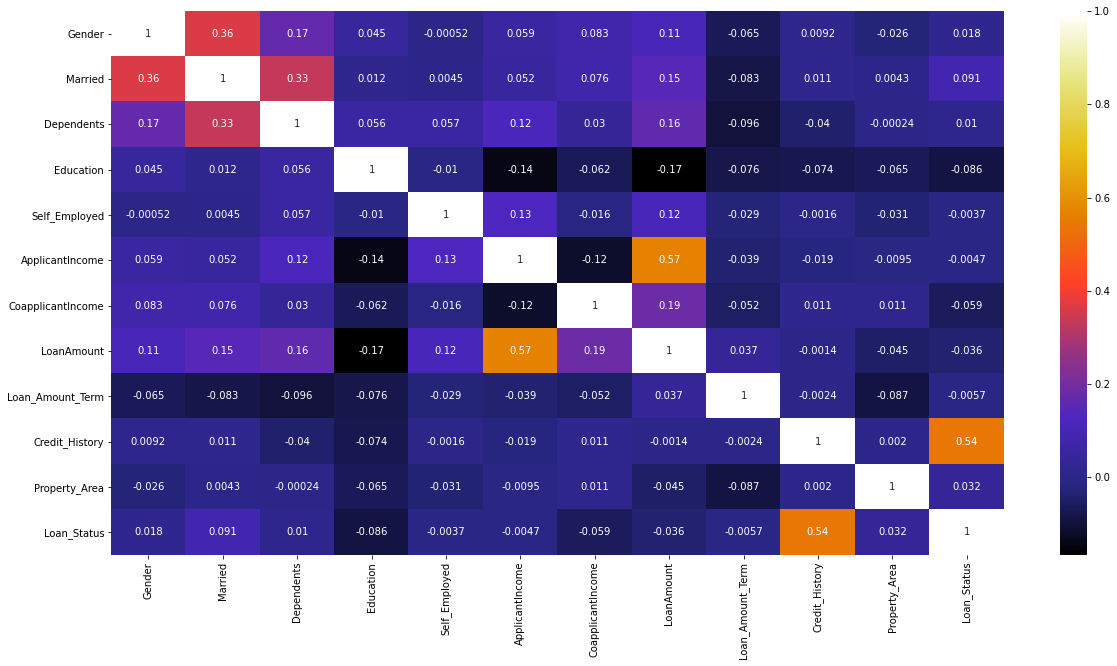

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor, cmap='CMRmap', annot= True)
plt.show()

 We can see the entire correlation of data here. 

To get the specified type of column with the target variable.

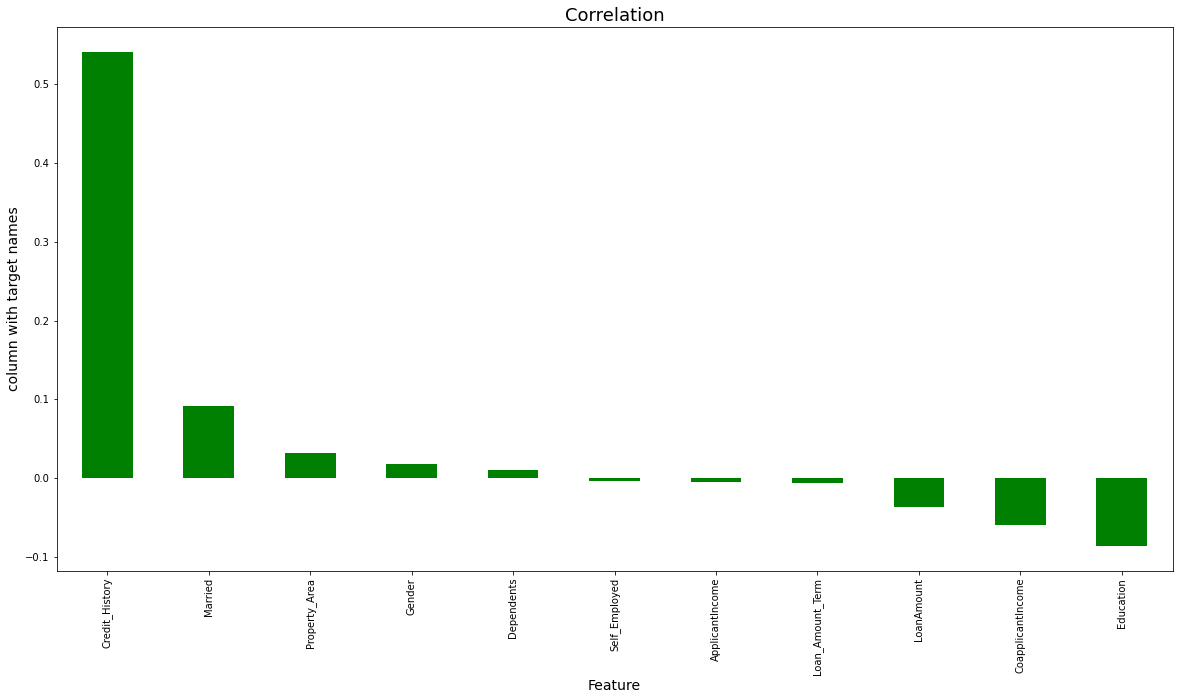

In [48]:
plt.figure(figsize=(20,10))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar', color='g')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("column with target names",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

credit history is highly positively correlated with Loan status and Education is highly negatively correlated with Loan status. we have very less correlation when comparing other feature columns to label columns. No columns is dropped as we have less data.

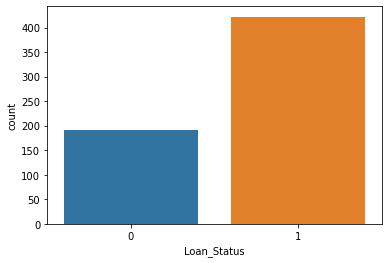

In [49]:
sns.countplot(x=df.Loan_Status)
plt.show()

The data is almost balanced. We need not resample it.

### Check outliers

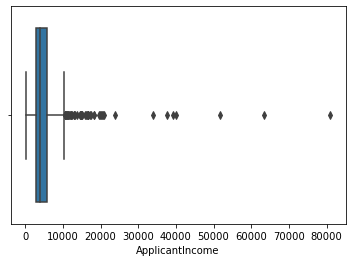

In [50]:
sns.boxplot(df.ApplicantIncome)
plt.show()

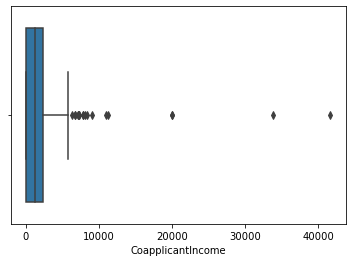

In [51]:
sns.boxplot(df.CoapplicantIncome)
plt.show()

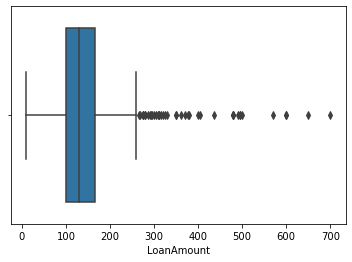

In [52]:
sns.boxplot(df.LoanAmount)
plt.show()

Outliers are present in columns ApplicantIncome, CoapplicantIncome, LoanAmount. We have to remove it for better result.

### Removing outliers

In [53]:
#zscore

from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

Outliers removed successfully

In [54]:
df_new=df[(z<3).all(axis=1)]

In [55]:
df.shape

(614, 12)

In [56]:
df_new.shape

(577, 12)

In [57]:
outliers_removed=614-577
outliers_removed

37

In [58]:
print(37/614*100)

6.026058631921824


The data loss is acceptable

In [59]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,8,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,8,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,8,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,8,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,8,1,0,1
610,1,1,3,0,0,4106,0.0,40.000000,5,1,0,1
611,1,1,1,0,0,8072,240.0,253.000000,8,1,2,1
612,1,1,2,0,0,7583,0.0,187.000000,8,1,2,1


# Model Building

## Splitting the data

In [60]:
X = df_new.drop('Loan_Status', axis = 1)
y = df_new['Loan_Status']

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [62]:
#finding best random_state
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(0,500):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,y_train)
    pred=LR.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.8908045977011494  on random_state  261


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 261)

## Classification Algorithms

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

lr.fit(X_train, y_train)
print("Logistic regression successfully implemented")

y_pred =  lr.predict(X_test)

# confussion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix:- ")
print(cm)

accuracy = accuracy_score(y_test,y_pred)

print("accuracy is:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Logistic regression successfully implemented
Confusion Matrix:- 
[[ 26  18]
 [  1 129]]
accuracy is:-  89.08045977011494
Classification Report:-
              precision    recall  f1-score   support

           0       0.96      0.59      0.73        44
           1       0.88      0.99      0.93       130

    accuracy                           0.89       174
   macro avg       0.92      0.79      0.83       174
weighted avg       0.90      0.89      0.88       174



### Decision tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
print("Decision Tree Algorithm is successfully implimented.")

y_pred = dtree.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Decision Tree Algorithm is successfully implimented.
Confusion Matrix:- 
[[30 14]
 [32 98]]
accuracy:-  73.5632183908046
Classification Report:-
              precision    recall  f1-score   support

           0       0.48      0.68      0.57        44
           1       0.88      0.75      0.81       130

    accuracy                           0.74       174
   macro avg       0.68      0.72      0.69       174
weighted avg       0.78      0.74      0.75       174



### Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
print("Rndom Forest Classifier successfully Implimented")

y_pred = rfc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Rndom Forest Classifier successfully Implimented
Confusion Matrix:- 
[[ 26  18]
 [  6 124]]
accuracy:-  86.20689655172413
Classification Report:-
              precision    recall  f1-score   support

           0       0.81      0.59      0.68        44
           1       0.87      0.95      0.91       130

    accuracy                           0.86       174
   macro avg       0.84      0.77      0.80       174
weighted avg       0.86      0.86      0.85       174



### Support Vector Machine

In [67]:
from sklearn.svm import SVC
svc= SVC()

svc.fit(X_train, y_train)
print("Support vactor classifier is successfully implemented")

y_pred = svc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


Support vactor classifier is successfully implemented
Confusion Matrix:- 
[[  0  44]
 [  0 130]]
accuracy:-  74.71264367816092
Classification Report:-
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.75      1.00      0.86       130

    accuracy                           0.75       174
   macro avg       0.37      0.50      0.43       174
weighted avg       0.56      0.75      0.64       174



### K Nearest Neighbors Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)

print("K-Nearest Neighbors classifier is successfully implemented")

y_pred = knn.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


K-Nearest Neighbors classifier is successfully implemented
Confusion Matrix:- 
[[  8  36]
 [ 22 108]]
accuracy:-  66.66666666666666
Classification Report:-
              precision    recall  f1-score   support

           0       0.27      0.18      0.22        44
           1       0.75      0.83      0.79       130

    accuracy                           0.67       174
   macro avg       0.51      0.51      0.50       174
weighted avg       0.63      0.67      0.64       174



### Ada Boost Classifier

In [69]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

print("Ada Boost Classifier is successfully implemented")

y_pred = adb.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


Ada Boost Classifier is successfully implemented
Confusion Matrix:- 
[[ 28  16]
 [  8 122]]
accuracy:-  86.20689655172413
Classification Report:-
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        44
           1       0.88      0.94      0.91       130

    accuracy                           0.86       174
   macro avg       0.83      0.79      0.81       174
weighted avg       0.86      0.86      0.86       174



### Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Naive Bayes is successfully implemented")

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)

# Accuracy test
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


Naive Bayes is successfully implemented
Confusion Matrix:- 
[[ 26   3]
 [ 18 127]]
accuracy:-  87.93103448275862
Classification Report:-
              precision    recall  f1-score   support

           0       0.90      0.59      0.71        44
           1       0.88      0.98      0.92       130

    accuracy                           0.88       174
   macro avg       0.89      0.78      0.82       174
weighted avg       0.88      0.88      0.87       174



## Result:-

1. Accuracy of Logistic Regression :- **89.08 %**
2. Accuracy of Decision Tree :- **74.71 %**
3. Accuracy of Random Forest Classifier :- **85.05 %**
4. Accuracy of Support Vecor Machine :- **74.71 %**
5. Accuracy of K Nearest Neighbors Classifier :- **66.66 %**
6. Accuracy of Ada Boost Classifier :- **86.20 %**
7. Accuracy of Naive Bayes :- **87.93 %**

### Testing Model

In [71]:
a= np.array(y_test)
predicted = np.array(lr.predict(X_test))
df=pd.DataFrame({"original":a, "predcted": predicted}, index= range(len(a)))
df.head(50)

,original,predcted
0,1,1
1,1,1
2,1,1
3,0,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,0,0



### From all the algorithm, Logistic Regression gives high accuracy of 89.08%.

The status of the loan can easily be predicted with this model. we could have been got better result if we had more good correlated datas



## Model Created Succsessfully !
## Thank You !